In [ ]:
#Part I

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [6]:
# Add a channel dimension to the images
x_train = x_train[..., tf.newaxis] # (60000, 28, 28, 1) 4D tensor (batch, height, width, channels)
x_test = x_test[..., tf.newaxis] # (10000, 28, 28, 1) 4D tensor (batch, height, width, channels)

In [9]:
#transform demantion 28x28 to 28x28x1
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [10]:
# Define the model architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [14]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 48s 110ms/step - loss: 0.5588 - accuracy: 0.8007 - val_loss: 0.3859 - val_accuracy: 0.8633
Epoch 2/10
422/422 [==============================] - 42s 100ms/step - loss: 0.3592 - accuracy: 0.8711 - val_loss: 0.3359 - val_accuracy: 0.8753
Epoch 3/10
422/422 [==============================] - 43s 102ms/step - loss: 0.3103 - accuracy: 0.8876 - val_loss: 0.3013 - val_accuracy: 0.8890
Epoch 4/10
422/422 [==============================] - 43s 102ms/step - loss: 0.2811 - accuracy: 0.8968 - val_loss: 0.2945 - val_accuracy: 0.8943
Epoch 5/10
422/422 [==============================] - 45s 106ms/step - loss: 0.2556 - accuracy: 0.9076 - val_loss: 0.2653 - val_accuracy: 0.9050
Epoch 6/10
422/422 [==============================] - 43s 102ms/step - loss: 0.2383 - accuracy: 0.9124 - val_loss: 0.2757 - val_accuracy: 0.8973
Epoch 7/10
422/422 [==============================] - 52s 123ms/step - loss: 0.2193 - accuracy: 0.9189 - val_loss: 0.2595 - val_ac

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.2544 - accuracy: 0.9087
Test accuracy: 0.9086999893188477


In [18]:
# Save the model
model.save("model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Load the model
model = keras.models.load_model("model1.h5")

In [20]:
# Make predictions on a sample of test images
predictions = model.predict(x_test[:10])


1/1 [==============================] - 0s 190ms/step


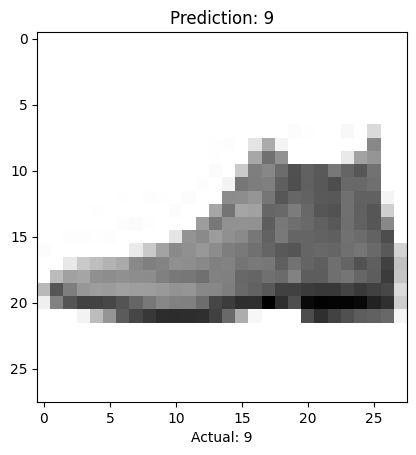

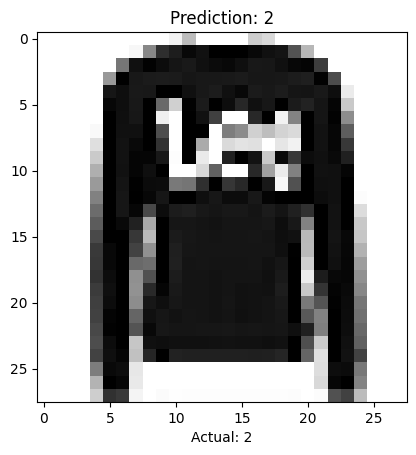

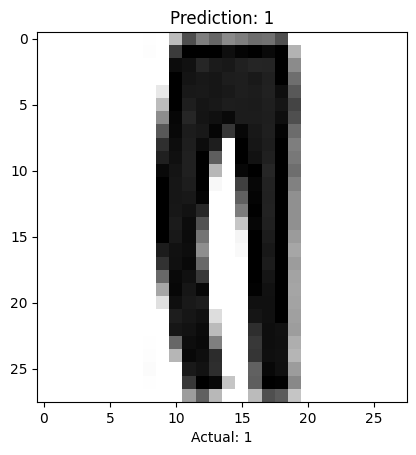

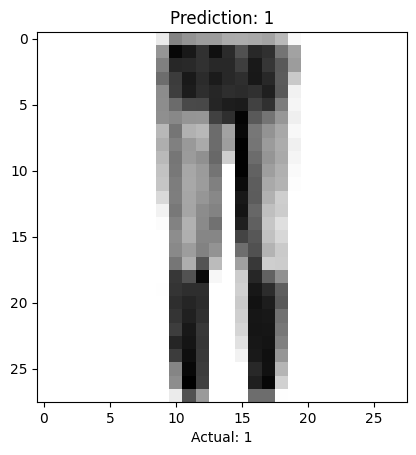

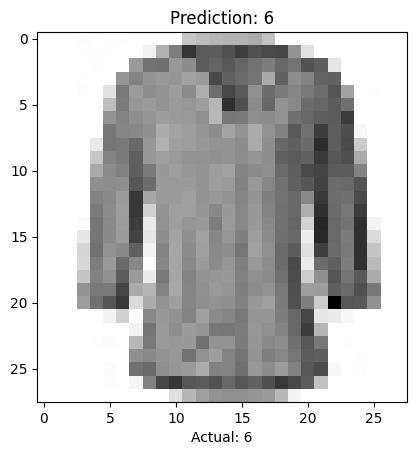

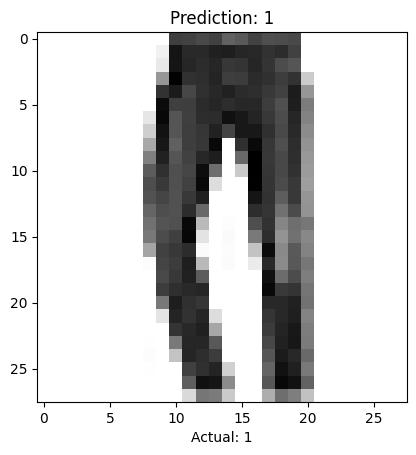

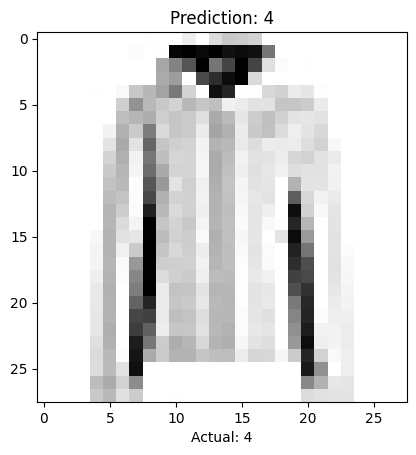

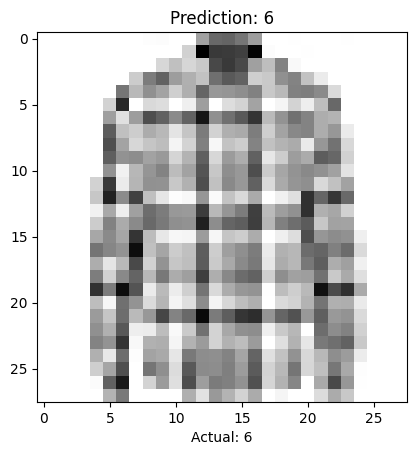

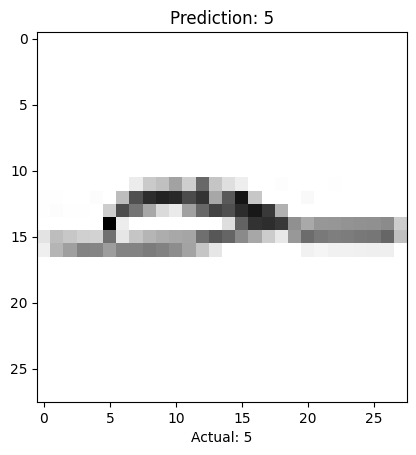

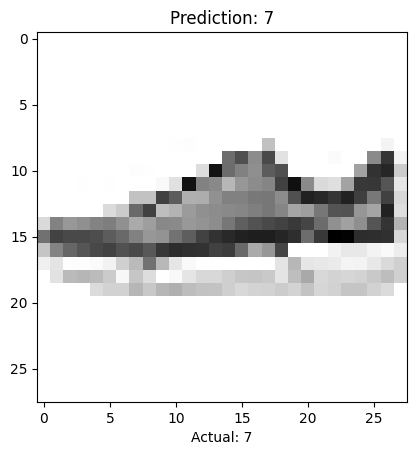

In [22]:
# Plot the first 10 test images and their predicted labels
import matplotlib.pyplot as plt
import numpy as np

#plot the first 10 test images, their predicted labels, and the true labels
#color correct predictions in green, incorrect predictions in red

for i in range(10):
    plt.grid(False)
    plt.imshow(x_test[i, :, :, 0], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {y_test[i]}")
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.show()
